In [ ]:
!pip install tensorflow_datasets

import tensorflow_datasets as tfds

# Load the IMDb Reviews dataset
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

# Split the dataset into training and testing sets
train_dataset, test_dataset = dataset['train'], dataset['test']

# Extract reviews and labels
train_reviews = [str(review.numpy()) for review, label in train_dataset]
train_labels = [label.numpy() for review, label in train_dataset]

test_reviews = [str(review.numpy()) for review, label in test_dataset]
test_labels = [label.numpy() for review, label in test_dataset]

# Display the first review and label
print("Sample Review:", train_reviews[0])
print("Label:", train_labels[0])





Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteF3I1WM/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteF3I1WM/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteF3I1WM/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Sample Review: b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Label: 0


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Download the word index to convert words to integers
word_index = tf.keras.datasets.imdb.get_word_index()

# Reverse the word index to map integers back to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the reviews
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Preprocess the text data
def preprocess_text_data(data, max_len):
    # Convert reviews to text
    decoded_data = [decode_review(review) for review in data]

    # Tokenization
    tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
    tokenizer.fit_on_texts(decoded_data)

    # Convert text to sequences of integers
    sequences = tokenizer.texts_to_sequences(decoded_data)

    # Padding
    padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post', padding='post')

    return padded_sequences

# Set the maximum length of the reviews
max_len = 256

# Preprocess training and test data
X_train = preprocess_text_data(train_data, max_len)
X_test = preprocess_text_data(test_data, max_len)

# Print the shape of the preprocessed data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (25000, 256)
Shape of X_test: (25000, 256)


In [ ]:
!pip install tensorflow tensorflow_datasets keras-transformer scikit-learn matplotlib seaborn


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-transformer: filename=keras_transformer-0.40.0-py3-none-any.whl size=12286 sha256=0d18195a099b38b57096fada5f826fc5807c400e9f7343c42135225e9f82d791
  Stored in directory: /root/.cache/pip/wheels/f2/cb/22/75a0ad376129177f7c95c0d91331a18f5368fd657f4035ba7c
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.10.0-py3-none-any.whl size=3945 sha256=5e01c2c88255878e2bf01b753aad5c6f885ac9401387a212af1839b409e3d820
  Stored in directory: /root/.cache/pip/wheels/82/32/c7/fd35d0d1b840a6c7cbd4343f808d10d0f7b87d271a4dbe796f
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4654 sha256=a4f0c79275d9af091b713c55b32c49af5c6

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding (Embedding)       (None, 256, 128)          1280000   
                                                                 
 transformer_block (Transfo  (None, 256, 128)          141888    
 rmerBlock)                                                      
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_3 (Dense)             (None, 50)                6450      
                                                                 
 dense_4 (Dense)             (None, 1)                 51    

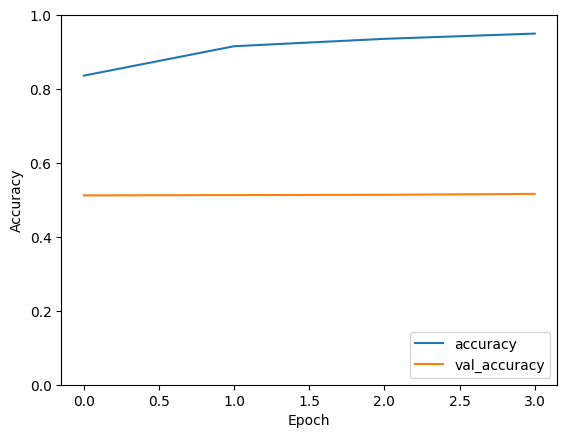

782/782 - 119s - loss: 0.8815 - accuracy: 0.5122 - 119s/epoch - 152ms/step

Test Accuracy: 0.5122399926185608
782/782 [==============================] - 123s 157ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.49     12500
           1       0.51      0.55      0.53     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.51      0.51      0.51     25000



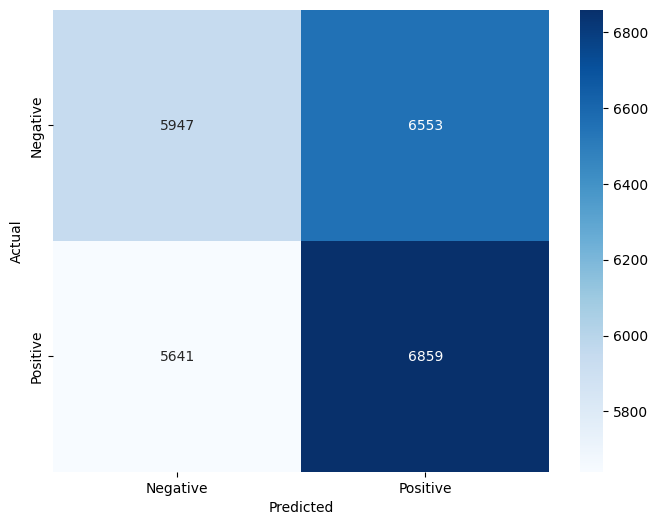

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Transformer block
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

# Adjust the dimensions of the dense layer in the transformer model

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Define the Transformer model architecture
def transformer_model(max_len, vocab_size):
    inputs = layers.Input(shape=(max_len,))

    # Embedding layer
    embedding = layers.Embedding(input_dim=vocab_size, output_dim=128)(inputs)

    # Transformer block
    transformer_block = TransformerBlock(128, num_heads=2, ff_dim=32)(embedding)

    # Global average pooling
    pooling = layers.GlobalAveragePooling1D()(transformer_block)

    # Dense layer
    dense = layers.Dense(50, activation='relu')(pooling)

    # Output layer
    outputs = layers.Dense(1, activation='sigmoid')(dense)

    model = models.Model(inputs=inputs, outputs=outputs)

    return model

# Set the vocabulary size
vocab_size = 10000

# Create the model
model = transformer_model(max_len, vocab_size)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Use early stopping in model.fit
history = model.fit(
    X_train,
    train_labels,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, test_labels),
    callbacks=[early_stopping]
)

# Implement a learning rate schedule


# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Model evaluation on the testing set
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc}")

# Predictions on the testing set
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype('int32')

# Calculate performance metrics
print("\nClassification Report:")
print(classification_report(test_labels, binary_predictions))

# Generate a confusion matrix
cm = confusion_matrix(test_labels, binary_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Document Link - https://docs.google.com/document/d/1Q5mMVBxTlhRLg-JxrGdZulUN8_Zg8hJW31j7at5Savw/edit?usp=sharing
# by Pulkit Chikara